#### Proyecto: Tanque CSTR

Imagine un tanque en el que se mezclan tres corrientes provenientes de diferentes partes de una planta química. Las fracciones de masa de los compuestos A, B y C en cada corriente, así como sus tasas de flujo se muestran en la siguiente figura. Encuentre la tasa de flujo másico para cada corriente ($F_1, F_2, F_3$) que debe usarse para obtener una corriente de salida con la composición que se muestra en la figura (30% de A, 40% de B y 30% de C). Escriba el balance de masa para cada compuesto (A, B, C) y resuelva el sistema de ecuaciones algebraicas. 

![Tanque CSTR](Diagrama.png)

Composiciones de cada especie involucrada

In [1]:
# Especie A
xA1 = 0.5
xA2 = 0.33
xA4 = 0.3

# Especie B  
xB1 = 0.5 
xB2 = 0.33 
xB3 = 0.7
xB4 = 0.4 

# Especie C  
xC2 = 0.34 
xC3 = 0.3
xC4 = 0.3 

0.3

Flujo de salida

In [2]:
F4 = 100  # kg/min

100

A partir de los balances por especie generamos nuestra matriz de composiciones así como el vector de salidas

In [3]:
Composiciones_1= [xA1 xA2 0; xB1 xB2 xB3; 0 xC2 xC3]
Salidas_1 = [xA4*F4; xB4*F4; xC4*F4]

3-element Vector{Float64}:
 30.0
 40.0
 30.0

Para dar solución, podemos usar varios métodos utilizando la libreria LinearAlgebra. En nuestro caso lo resolveremos usando inversa.

In [4]:
using LinearAlgebra

Sol = inv(Composiciones_1)*Salidas_1

3-element Vector{Float64}:
 10.084033613445385
 75.63025210084034
 14.285714285714285

Finalmente solo aplicamos un formato

In [5]:
for k in eachindex(Sol)
    println("Alimentación F",k, ": ", round(Sol[k], digits=4), " kg/min")
end

Alimentación F1: 10.084 kg/min
Alimentación F2: 75.6303 kg/min
Alimentación F3: 14.2857 kg/min


#### Modificación del proyecto

Variando las concentraciones de A en la corriente 1 dese 0.4 a 0.6

Paquetes utilizados

In [6]:
using Distributions, PyPlot

Aplicando una distribución uniforme en los valores indicados

In [7]:
D = Uniform(0.4, 0.6)

Uniform{Float64}(a=0.4, b=0.6)

Generamos diez valores de composición de la especia A y ajustamos la composición de B

In [8]:
# Especie A
Cantidad = 10
xA1 = sort(rand(D, Cantidad))
xA2 = 0.33
xA4 = 0.3

# Especie B
xB1 = []
for i in eachindex(xA1)
    append!(xB1, 1 - xA1[i])
end
xB2 = 0.33 
xB3 = 0.7
xB4 = 0.4 

# Especie C
xC2 = 0.34 
xC3 = 0.3
xC4 = 0.3

# Corriente 4
F4 = 100  # kg/min

100

Creamos vectores vacios donde se guardarán los datos obtenidos en cada iteración

In [9]:
Soluciones = []
F1 = []
F2 = []
F3 = []

Any[]

Finalmente, aplicamos un ciclo para generar cada escenario. El ciclo interno imprime cada escenario generado

In [10]:
for i in eachindex(xA1)
    # Generamos una matriz distinta para cada valor de xA1 y xB1
    Composiciones = [xA1[i] xA2 0; xB1[i] xB2 xB3; 0 xC2 xC3]
    # La matriz de soluciones se mantiene igual pues el cambio es a la entrada
    Salidas = [xA4*F4; xB4*F4; xC4*F4]
    # Resolvemos usando inversa
    Sol = inv(Composiciones)*Salidas
    # Agregamos cada resultado a su correspondiente clasificación
    append!(F1, Sol[1])
    append!(F2, Sol[2])
    append!(F3, Sol[3])
    # Imprimimos cada n escenarios generados
    println("\n------ Escenario ", i, "-------")
    for k in eachindex(Sol)
        println("Alimentación F",k, ": ", round(Sol[k], digits=4), " kg/min")
    end
    # Agregamos las solucion obtenida al respectivo vector
    append!(Soluciones, [Sol])
end


------ Escenario 1-------
Alimentación F1: 10.4247 kg/min
Alimentación F2: 78.185 kg/min
Alimentación F3: 11.3903 kg/min

------ Escenario 2-------
Alimentación F1: 10.3726 kg/min
Alimentación F2: 77.7943 kg/min
Alimentación F3: 11.8332 kg/min

------ Escenario 3-------
Alimentación F1: 10.3403 kg/min
Alimentación F2: 77.5526 kg/min
Alimentación F3: 12.1071 kg/min

------ Escenario 4-------
Alimentación F1: 10.209 kg/min
Alimentación F2: 76.5674 kg/min
Alimentación F3: 13.2236 kg/min

------ Escenario 5-------
Alimentación F1: 10.1056 kg/min
Alimentación F2: 75.7921 kg/min
Alimentación F3: 14.1023 kg/min

------ Escenario 6-------
Alimentación F1: 10.0791 kg/min
Alimentación F2: 75.5933 kg/min
Alimentación F3: 14.3276 kg/min

------ Escenario 7-------
Alimentación F1: 10.0635 kg/min
Alimentación F2: 75.4762 kg/min
Alimentación F3: 14.4603 kg/min

------ Escenario 8-------
Alimentación F1: 9.9912 kg/min
Alimentación F2: 74.9337 kg/min
Alimentación F3: 15.0751 kg/min

------ Escenario 9

Peor y mejor escenario respecto a la variación en la composición

In [11]:
Titulo = ["Peor Escenario", " Mejor Escenario"]
Esc = [1, Cantidad]
for i in eachindex(Esc)
    println("\n\n", Titulo[i])
    println("Composición A: ", round(xA1[Esc[i]], digits=4))
    println("Alimentación F1: ", round(F1[Esc[i]], digits=4), " kg/min")
    println("Alimentación F2: ", round(F2[Esc[i]], digits=4), " kg/min")
    println("Alimentación F3: ", round(F3[Esc[i]], digits=4), " kg/min")
end



Peor Escenario
Composición A: 0.4028
Alimentación F1: 10.4247 kg/min
Alimentación F2: 78.185 kg/min
Alimentación F3: 11.3903 kg/min


 Mejor Escenario
Composición A: 0.5946
Alimentación F1: 9.7733 kg/min
Alimentación F2: 73.2999 kg/min
Alimentación F3: 16.9268 kg/min


Escenario promedio

In [12]:
prom_xA1 = sum(xA1)/length(xA1)
prom_F1 = sum(F1)/length(F1)
prom_F2 = sum(F2)/length(F2)
prom_F3 = sum(F3)/length(F3)
println("Escenario promedio")
println("\n\nComposicion media de A: ", round(prom_xA1, digits=4))
println("Alimentación F1: ", round(prom_F1, digits=4), " kg/min")
println("Alimentación F2: ", round(prom_F2, digits=4), " kg/min")
println("Alimentación F3: ", round(prom_F3, digits=4), " kg/min")

Escenario promedio


Composicion media de A: 0.4861
Alimentación F1: 10.1349 kg/min
Alimentación F2: 76.0116 kg/min
Alimentación F3: 13.8536 kg/min


Gráfico generado por cada variación

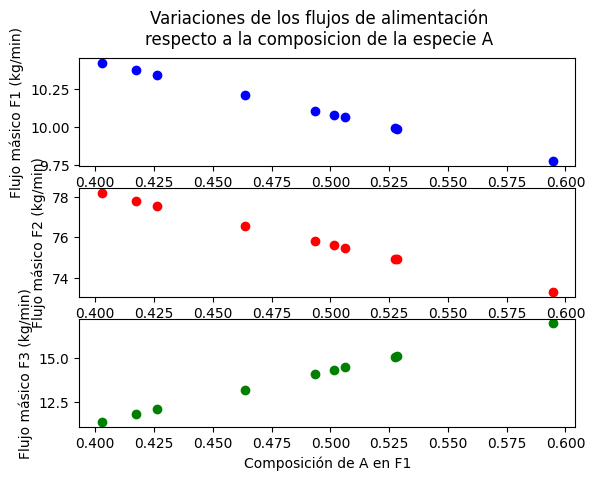

PyObject Text(33.25, 0.5, 'Flujo másico F3 (kg/min)')

In [13]:
fig, axs = subplots(3)
fig.suptitle("Variaciones de los flujos de alimentación\nrespecto a la composicion de la especie A")
axs[1].scatter(xA1, F1, c="blue")
axs[1].set_ylabel("Flujo másico F1 (kg/min)")

axs[2].scatter(xA1, F2, c="red")
axs[2].set_ylabel("Flujo másico F2 (kg/min)")

axs[3].scatter(xA1, F3, c="green")
axs[3].set_xlabel("Composición de A en F1")
axs[3].set_ylabel("Flujo másico F3 (kg/min)")

Como podemos observar el aumento en la composición de A genera que se requiera menos flujo de $F_1$ y $F_2$ mientras que se vuelve necesario aumentar el correspondiente a $F_3$
